K-means : Le score de silhouette moyen est : 0.6725
DBSCAN : Le score de silhouette moyen est : 0.5643
Agglomerative Clustering : Le score de silhouette moyen est : 0.6497
Gaussian Mixture : Le score de silhouette moyen est : 0.4380


C:\Users\user\AppData\Local\Temp\ipykernel_15956\2542551242.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette='viridis')


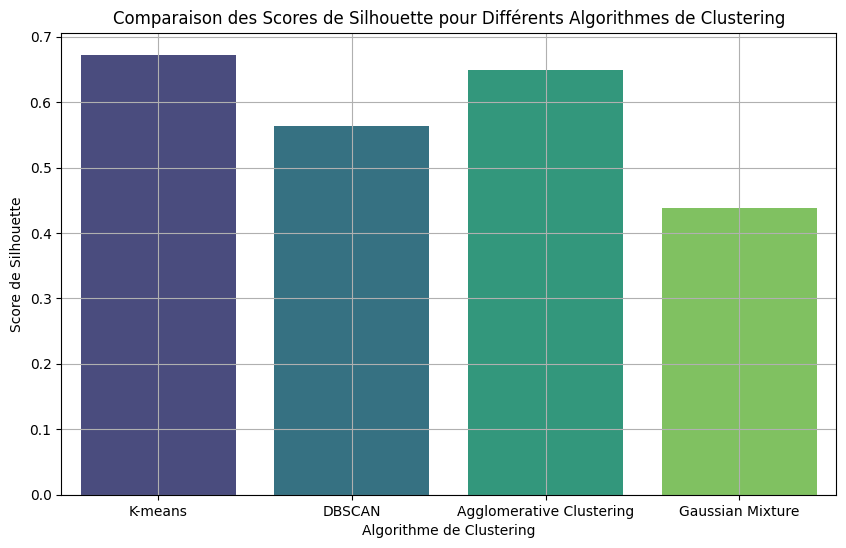

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'Remdoc New.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

# Renommer les colonnes pour enlever les espaces
data.rename(columns=lambda x: x.strip(), inplace=True)

# Convertir les dates en format datetime
data['DVA'] = pd.to_datetime(data['DVA'], format='%d/%m/%Y')

# Ajouter une colonne pour l'année
data['year'] = data['DVA'].dt.year

# Calculer les caractéristiques pour chaque client
client_features = data.groupby('NOM').agg(
    Total_Montant=('MT_LOC', 'sum'),
    Mean_Montant=('MT_LOC', 'mean'),
    Nb_Transactions=('NDOS', 'count'),
    Freq_Transactions=('year', 'nunique'),
    Annees_Actives=('year', lambda x: x.max() - x.min() + 1)
).reset_index()

# Normaliser les données
scaler = StandardScaler()
client_features_scaled = scaler.fit_transform(client_features[['Total_Montant', 'Mean_Montant', 'Nb_Transactions', 'Freq_Transactions', 'Annees_Actives']])

# Appliquer différents algorithmes de clustering et calculer les scores de silhouette
algorithms = {
    'K-means': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=5),
    'Gaussian Mixture': GaussianMixture(n_components=5, random_state=42)
}

silhouette_scores = {}

for name, algorithm in algorithms.items():
    if name == 'Gaussian Mixture':
        cluster_labels = algorithm.fit_predict(client_features_scaled)
    else:
        cluster_labels = algorithm.fit(client_features_scaled).labels_
    silhouette_avg = silhouette_score(client_features_scaled, cluster_labels)
    silhouette_scores[name] = silhouette_avg
    print(f"{name} : Le score de silhouette moyen est : {silhouette_avg:.4f}")

# Visualiser les scores de silhouette pour chaque algorithme
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette='viridis')
plt.title('Comparaison des Scores de Silhouette pour Différents Algorithmes de Clustering')
plt.xlabel('Algorithme de Clustering')
plt.ylabel('Score de Silhouette')
plt.grid(True)
plt.show()
